In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
import xgboost as xgb

pd.reset_option('max_columns',100)
pd.options.display.float_format = lambda x : '{:,.2f}'.format(x) if (np.isnan(x) | np.isinf(x)) else '{:,.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)

In [2]:
df = pd.read_csv("vehicles.csv")

In [3]:
df.shape

(426880, 26)

In [4]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
df['county'].unique()

array([nan])

In [6]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
df.drop(['id','url','region_url','model','image_url','description','lat','long','posting_date','VIN','county'], axis=1,inplace=True)

In [8]:
df.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [9]:
df['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [10]:
df['title_status'].isnull().sum()

8242

In [11]:
df['year']=df['year'].fillna(df['year'].mode()[0])

In [12]:
df.isnull().sum()

region               0
price                0
year                 0
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [13]:
df["manufacturer"].dropna(inplace=True)
df['paint_color']=df['paint_color'].fillna('Unknown')

In [14]:
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,"2,017",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,az
1,fayetteville,11900,"2,017",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,ar
2,florida keys,21000,"2,017",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,fl
3,worcester / central MA,1500,"2,017",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,ma
4,greensboro,4900,"2,017",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,"2,019",nissan,good,6 cylinders,gas,"32,226",clean,other,fwd,NaN,sedan,Unknown,wy
426876,wyoming,30590,"2,020",volvo,good,NaN,gas,"12,029",clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990,"2,020",cadillac,good,NaN,diesel,"4,174",clean,other,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,"2,018",lexus,good,6 cylinders,gas,"30,112",clean,other,fwd,NaN,sedan,silver,wy


In [15]:
df.isnull().sum()

region               0
price                0
year                 0
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color          0
state                0
dtype: int64

In [16]:
df.dtypes

region           object
price             int64
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [17]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=df[i].fillna(df[i].mode()[0])

In [18]:
df['odometer']=df['odometer'].fillna(df['odometer'].mean())

In [19]:
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,"2,017",ford,good,6 cylinders,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,az
1,fayetteville,11900,"2,017",ford,good,6 cylinders,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,ar
2,florida keys,21000,"2,017",ford,good,6 cylinders,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,fl
3,worcester / central MA,1500,"2,017",ford,good,6 cylinders,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,ma
4,greensboro,4900,"2,017",ford,good,6 cylinders,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,"2,019",nissan,good,6 cylinders,gas,"32,226",clean,other,fwd,full-size,sedan,Unknown,wy
426876,wyoming,30590,"2,020",volvo,good,6 cylinders,gas,"12,029",clean,other,fwd,full-size,sedan,red,wy
426877,wyoming,34990,"2,020",cadillac,good,6 cylinders,diesel,"4,174",clean,other,4wd,full-size,hatchback,white,wy
426878,wyoming,28990,"2,018",lexus,good,6 cylinders,gas,"30,112",clean,other,fwd,full-size,sedan,silver,wy


In [20]:
df['cylinders'].unique()

array(['6 cylinders', '8 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [21]:
df['cylinders']=df['cylinders'].apply(lambda x:x[0:2])

In [22]:
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,"2,017",ford,good,6,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,az
1,fayetteville,11900,"2,017",ford,good,6,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,ar
2,florida keys,21000,"2,017",ford,good,6,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,fl
3,worcester / central MA,1500,"2,017",ford,good,6,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,ma
4,greensboro,4900,"2,017",ford,good,6,gas,"98,043.33",clean,automatic,4wd,full-size,sedan,Unknown,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,"2,019",nissan,good,6,gas,"32,226",clean,other,fwd,full-size,sedan,Unknown,wy
426876,wyoming,30590,"2,020",volvo,good,6,gas,"12,029",clean,other,fwd,full-size,sedan,red,wy
426877,wyoming,34990,"2,020",cadillac,good,6,diesel,"4,174",clean,other,4wd,full-size,hatchback,white,wy
426878,wyoming,28990,"2,018",lexus,good,6,gas,"30,112",clean,other,fwd,full-size,sedan,silver,wy


In [23]:
unique_values=[]
for i in df.columns:
    unique_values.append([i, int(df[i].nunique())])

In [24]:
unique_values

[['region', 404],
 ['price', 15655],
 ['year', 114],
 ['manufacturer', 42],
 ['condition', 6],
 ['cylinders', 8],
 ['fuel', 5],
 ['odometer', 104871],
 ['title_status', 6],
 ['transmission', 3],
 ['drive', 3],
 ['size', 4],
 ['type', 13],
 ['paint_color', 13],
 ['state', 51]]

In [25]:
df['year']=df.year.astype(int)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

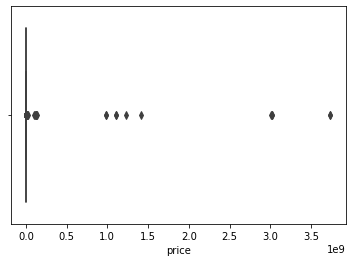

In [26]:
sns.boxplot(df['price'])

In [27]:
price_list=df['price'].unique()
for i in price_list:
    print(i)

6000
11900
21000
1500
4900
1600
1000
15995
5000
3000
0
13995
24999
21850
26850
11999
500
33590
22590
39590
30990
15000
27990
34590
35000
29990
38590
4500
32990
24590
37990
30590
38990
31590
19900
16590
26990
25590
14000
28590
25990
34990
22500
31990
23990
22990
33990
26590
18590
29590
21590
37590
28990
36990
19990
2100
80
15990
20590
12990
36590
40590
43990
9500
35990
17500
6800
14990
39990
2500
4000
27590
40990
14590
10990
8990
52990
19000
28000
17590
32590
21950
13950
5900
12950
18950
6995
12500
16950
22950
19950
10950
1800
21250
4299
3950
34995
3200
3495
6500
16988
32186
16477
58977
6900
3750
3500
1300
8000
32000
3399
3900
2800
53000
20995
25995
31995
5500
29000
24990
3300
27000
27995
8100
20000
3999
23500
5300
45900
16902
12307
37500
21688
35590
18977
6877
27998
45000
2550
3800
2975
7980
7800
9000
5980
13500
2675
6980
11500
987654321
2600
4980
26995
5480
16990
3975
6480
22900
24997
6700
26500
27988
20870
26988
19877
11977
29998
12895
3650
8500
3299
4499
5940
8980
4950
4400
21990
41

24770
12987
10497
27770
16440
37770
38880
46987
18440
53480
4997
13987
17318
14653
16324
51025
18793
45103
24683
49038
33996
13122
13467
9987
36985
12985
14937
13282
14983
14674
12388
31400
89900
28657
33652
22567
29845
28925
35735
73879
39598
23916
30595
22520
82665
14546
61155
57341
14259
56687
70641
29771
37859
36197
53025
48955
21942
52599
34944
23839
37190
54819
52880
32442
23483
37553
46282
41569
52488
42994
7675
1150
9621
55748
76128
30798
78423
38732
47400
21831
21589
36949
35310
17411
26630
18646
14675
24553
40917
39864
40679
29211
44902
53562
28499
29795
41940
37640
31899
56954
29367
18910
19117
34685
20183
31309
51180
18959
49628
45285
24940
49531
24415
34149
9514
68367
5888
10344
9120
10922
14247
13457
9888
15895
53521
13685
35653
27798
20792
31750
65500
12974
14743
25250
8225
149000
10895
37614
20664
40969
28865
47656
63400
11660
14100
61400
49998
21650
11288
11788
9895
35700
50700
18325
23735
14925
10588
18488
86000
54866
47600
29200
11777
16800
10777
21595
55900
2499
198

15498
35980
8699
34859
1485
1055
3180
31877
27991
24489
15781
217
17973
23749
16747
38779
136
3490
29750
28600
257995
4575
247
181
512
23618
29650
28469
431
19677
16149
3099
27994
65
21400
43750
43200
87000
8275
65998
39992
41991
22491
18225
17245
31435
10475
16325
28725
10455
223950
13955
13445
61500
6991
9445
35865
4880
25700
29725
39403
38865
62774
39974
59744
28805
39805
42250
50865
47865
62765
70998
45765
46765
22765
28765
48865
15491
32994
39991
39491
40911
49991
33765
55455
52610
13978
49765
17765
4588
26977
44865
55765
27300
74900
18891
12731
13599
9718
777
12671
10968
9819
39140
38895
40690
105840
47900
156900
8879
25562
15992
15148
12386
13754
15841
22775
21945
8419
80900
38600
27654
27164
29400
15919
22896
12650
13971
26919
9962
18849
15972
10778
34778
33774
42774
15774
13517
11962
13192
14799
15290
13339
56590
27795
23993
18480
47663
17881
54932
26492
99900
21958
19923
9881
50309
164
11930
6840
35972
31894
32245
37898
12600
21488
24749
30877
36445
7692
12235
564
127
27546
1

114
4965
8902
10370
27409
5993
3494
41079
2880
3994
11902
13902
14903
14920
6903
30947
50427
11861
9905
9705
14905
19207
32400
57764
31939
55901
29775
153
23571
36945
9443
27323
14627
21899
25790
16686
31458
47777
20550
27390
29320
33982
7794
13720
17320
32
5875
38914
21788
12588
44991
6788
8388
32542
17492
30610
29329
18540
1508
33320
34989
15851
17760
27603
14596
13301
10346
10729
13491
33758
12474
29824
32745
21637
15043
9025
20629
25943
17158
27642
18410
19749
27645
31790
17692
42989
33295
33041
25597
25501
4050
23740
8698
28330
12123
12460
18134
29591
34898
10691
13974
18818
8549
23974
25610
13810
25629
19951
12271
8551
8448
26360
19329
11320
9870
29556
15390
22164
45750
29798
5449
18875
14452
8335
19968
28192
27687
16555
15728
8340
22451
24170
31798
11309
27620
23884
7570
14570
21245
17551
38111
96000
36498
119991
33602
12275
35550
14885
14863
9653
15574
28923
25891
16133
16725
51286
36488
20649
66988
13880
16880
13680
3880
17880
11880
13480
3680
92990
8105
472
5910
25258
1997
56

46650
15982
9348
46685
15783
6410
45779
109995
110
74990
9983
8483
6529
129995
6290
175000
19
38944
67990
17390
35250
2220
5349
4294
3885
19625
34589
19380
87500
25049
9944
37944
55944
15944
18955
15955
152995
13395
27
33199
25944
33944
36944
41869
43895
209995
64895
9386
33366
14915
53433
37595
34544
8424
39489
15575
18789
40636
17799
27489
22629
4951
34641
33340
26190
32527
32206
37833
18377
31371
30977
39733
29855
29240
27791
7193
26815
26470
23970
12774
6849
26140
6475
42992
33877
25765
25472
180000
17366
25401
24872
10425
21550
44910
92000
20581
24025
24352
23020
28491
22814
24445
3287
21421
20453
21310
1960
17360
8345
19624
28589
87990
91000
29655
15343
8476
18353
17969
1935
33892
23466
38344
4616
29
33333
17774
17311
3925
69433
12393
69975
76985
3315
4515
15824
15303
8875
5845
33644
30989
20689
14396
13210
14379
5110
37344
8620
47989
16670
11375
8050
1249
1410065407
28
51590
15790
20780
21780
29780
28790
31390
380
9786
29790
27680
17780
79190
25390
493
21390
2945
5340
76480
582


26421
24721
23944
24935
7415
21935
17939
11248
21911
204
15733
17914
21743
18436
50119
10876
14954
15552
17729
17481
578
23452
14927
14911
14946
51321
39415
49415
25331
25933
23828
11876
11934
31923
31726
30439
13946
23327
19714
16758
14408
33432
34913
40724
36916
37941
34767
88995
33424
14928
30802
16468
14405
20424
29926
10773
24760
34946
28929
8444
18736
12853
16946
26417
23628
19426
33100
20480
14314
17919
72975
8425
16224
69891
34925
10910
39300
84000
85300
13797
160000
8245
27655
38497
4485
47250
65895
68523
4225
77077
435
23485
930
19785
1776
14825
14275
519
7291
261895
12580
11030
11025
5391
2095
9291
8491
17691
2398
43199
10527
139999
951
9527
5927
35812
43358
24279
10891
9846
51340
22844
789
1149
22429
21670
112999
16979
154999
12515
27662
30395
4559
2920
66499
49499
13170
20100
5963
70999
11729
1489
25936
26359
5827
9827
11927
32398
97999
179999
42498
8098
34198
16778
26345
13417
20959
30660
21959
28039
30982
19221
22691
27751
14522
27918
22228
26291
12721
12737
21471
26789


21516
16615
5606
18605
18906
7812
47447
23099
16001
144832
25484
41608
17543
40548
37697
29675
30978
35678
31048
31485
19778
18549
13947
11568
12210
28954
27455
34749
23929
32077
31849
33827
21949
12966
36551
11649
28649
33930
11831
26749
12722
21837
15826
12766
20182
38075
22834
33709
36449
18471
18847
24893
35187
36929
16279
9327
41470
7426
10849
75497
28455
24839
26373
13429
37649
22610
6926
12712
7452
21389
37429
17396
29797
39875
36452
30829
15609
35491
23755
25675
20410
11907
28257
28001
23304
17649
21322
27902
11779
20779
23770
52875
38952
15242
34620
20309
22935
44175
25102
4649
14730
16929
5660
37902
20692
26852
21275
23724
36825
31712
19457
36152
44967
37879
12457
22391
18259
62989
28979
6476
31591
11329
20449
31919
19739
25653
20161
18118
17540
68265
18603
34780
34348
45777
3711
108999
68800
290000
69455
65850
55850
22855
20395
18191
10155
14291
12191
13191
11791
11191
17534
33631
29979
20089
16458
31391
27528
33781
21681
26983
20772
13883
6897
34457
30270
29897
26948
7683
2

In [28]:
df.replace(0, df['price'].median(), inplace=True)

In [29]:
price_list=df['price'].unique()
for i in price_list:
    print(i)

6000
11900
21000
1500
4900
1600
1000
15995
5000
3000
13950
13995
24999
21850
26850
11999
500
33590
22590
39590
30990
15000
27990
34590
35000
29990
38590
4500
32990
24590
37990
30590
38990
31590
19900
16590
26990
25590
14000
28590
25990
34990
22500
31990
23990
22990
33990
26590
18590
29590
21590
37590
28990
36990
19990
2100
80
15990
20590
12990
36590
40590
43990
9500
35990
17500
6800
14990
39990
2500
4000
27590
40990
14590
10990
8990
52990
19000
28000
17590
32590
21950
5900
12950
18950
6995
12500
16950
22950
19950
10950
1800
21250
4299
3950
34995
3200
3495
6500
16988
32186
16477
58977
6900
3750
3500
1300
8000
32000
3399
3900
2800
53000
20995
25995
31995
5500
29000
24990
3300
27000
27995
8100
20000
3999
23500
5300
45900
16902
12307
37500
21688
35590
18977
6877
27998
45000
2550
3800
2975
7980
7800
9000
5980
13500
2675
6980
11500
987654321
2600
4980
26995
5480
16990
3975
6480
22900
24997
6700
26500
27988
20870
26988
19877
11977
29998
12895
3650
8500
3299
4499
5940
8980
4950
4400
21990
4100

9888
15895
53521
13685
35653
27798
20792
31750
65500
12974
14743
25250
8225
149000
10895
37614
20664
40969
28865
47656
63400
11660
14100
61400
49998
21650
11288
11788
9895
35700
50700
18325
23735
14925
10588
18488
86000
54866
47600
29200
11777
16800
10777
21595
55900
2499
19870
58850
37800
54800
8395
19488
48600
63600
9449
2599
105000
103799
24895
41200
93450
163540
84477
8190
10648
14168
16780
20980
16388
54510
19777
11555
21377
87700
37850
18238
24750
12555
11333
20265
59500
16450
68988
42598
40698
17483
13573
10393
16793
15293
18753
14133
14833
21583
19873
11650
17295
6650
13973
10253
10743
21401
38550
20700
20249
14753
7865
10933
12983
10563
10233
11673
12
33885
27250
28250
30300
36885
111111
57980
22389
23595
54220
33397
45780
51980
46480
56444
55559
65360
52499
21311
56711
15200
10490
83880
36455
53290
21839
44000
37647
46773
41994
53456
33880
37740
33700
1395
63900
45225
39865
23631
31800
11974
52277
19983
40963
35837
36996
52049
51792
19485
45653
24983
50380
24478
34388
32998
2

512
23618
29650
28469
431
19677
16149
3099
27994
65
21400
43750
43200
87000
8275
65998
39992
41991
22491
18225
17245
31435
10475
16325
28725
10455
223950
13955
13445
61500
6991
9445
35865
4880
25700
29725
39403
38865
62774
39974
59744
28805
39805
42250
50865
47865
62765
70998
45765
46765
22765
28765
48865
15491
32994
39991
39491
40911
49991
33765
55455
52610
13978
49765
17765
4588
26977
44865
55765
27300
74900
18891
12731
13599
9718
777
12671
10968
9819
39140
38895
40690
105840
47900
156900
8879
25562
15992
15148
12386
13754
15841
22775
21945
8419
80900
38600
27654
27164
29400
15919
22896
12650
13971
26919
9962
18849
15972
10778
34778
33774
42774
15774
13517
11962
13192
14799
15290
13339
56590
27795
23993
18480
47663
17881
54932
26492
99900
21958
19923
9881
50309
164
11930
6840
35972
31894
32245
37898
12600
21488
24749
30877
36445
7692
12235
564
127
27546
16996
26491
19981
25791
32488
19391
35425
52981
16391
32210
15792
37492
41292
32291
46350
10591
12898
9591
201
28898
36952
13444
234

11224
21596
21627
17886
17962
16162
36602
38948
14649
22825
35729
37796
29927
27566
32873
17915
32528
21755
17258
15746
59590
2390
17255
31829
34729
16782
23259
13986
20732
25642
71590
18790
5996
8973
8745
590
16452
32593
11357
17936
168
177
151
835
223
10843
26290
260
141
138
511
67
12964
10754
21763
14484
17584
5620
9874
8842
17389
20317
18926
16607
16473
16645
17964
16942
18842
23356
18242
14964
152
33629
59334
49376
52925
43264
7492
24356
114
4965
8902
10370
27409
5993
3494
41079
2880
3994
11902
13902
14903
14920
6903
30947
50427
11861
9905
9705
14905
19207
32400
57764
31939
55901
29775
153
23571
36945
9443
27323
14627
21899
25790
16686
31458
47777
20550
27390
29320
33982
7794
13720
17320
32
5875
38914
21788
12588
44991
6788
8388
32542
17492
30610
29329
18540
1508
33320
34989
15851
17760
27603
14596
13301
10346
10729
13491
33758
12474
29824
32745
21637
15043
9025
20629
25943
17158
27642
18410
19749
27645
31790
17692
42989
33295
33041
25597
25501
4050
23740
8698
28330
12123
12460
18

29743
6984
13984
15765
9648
17984
9945
29862
16984
40880
14660
18425
66981
15011
7984
15984
11441
13535
30093
5774
8304
10670
11220
6170
9820
36984
29764
9794
5706
8149
22984
24984
15296
29464
49393
14534
20010
11330
27984
15843
18125
12869
49981
9419
12316
9415
12242
25981
14069
6065
32480
14120
26942
31229
45981
8405
9797
13681
39855
14640
9942
11785
11574
8945
13845
13375
13922
25922
25641
15623
9915
13915
22922
9734
13199
46922
44520
9759
31956
10925
11009
41996
28922
20922
12922
14277
28419
14679
25184
14355
30922
9725
9332
8654
11937
8219
41850
10081
8884
575
36850
3865
27176
6547
43300
44600
18970
15940
323
74991
72991
299991
8677
54511
16197
9697
77991
12940
9965
37994
68991
51991
82991
11655
18420
129991
99991
63991
87600
6660
14740
19440
7560
35750
38910
15570
75991
3480
16940
7377
54991
70991
24070
16890
24248
40750
28775
46650
15982
9348
46685
15783
6410
45779
109995
110
74990
9983
8483
6529
129995
6290
175000
19
38944
67990
17390
35250
2220
5349
4294
3885
19625
34589
19380

5273
16673
11273
8273
6273
7273
23973
18249
13755
12325
1050
5739
23399
5949
7198
1212
67985
830
21460
32742
17042
45890
25545
21464
23629
37131
32465
53657
26418
30455
44282
22465
21675
20312
26622
34050
46659
68829
33369
19898
35852
58687
28357
16124
25482
27943
7832
38200
49130
39255
53706
32455
28012
49852
14712
15003
57645
49982
28749
42350
22014
26572
120706
63750
22575
46812
40450
43727
23430
49735
25945
42750
2359
46095
62825
56750
15858
18447
32688
46733
17115
17080
18144
38599
48460
10055
22422
19733
26088
30644
21838
20858
15075
49225
43380
1075
43001
25518
45040
62940
53810
11099
41800
25684
38350
17100
15515
9192
16105
17277
22177
19222
31577
14088
64997
24797
80997
67997
20095
1198
5335
27893
46997
9383
39973
92497
55997
39197
27790
23867
7660
3265
19350
11493
11893
29986
55674
30250
4749
14430
17753
17265
18927
18747
27324
48909
32379
24918
26941
23464
128995
18451
13265
17896
11784
16774
13258
108519
33932
26924
27819
21929
36782
18564
42279
29596
64054
57781
36358
3671

29381
32731
31912
25903
22926
28413
25905
18526
12408
27513
19412
20521
38312
6902
23829
45527
29429
37506
54912
53429
25929
29406
49920
42901
14705
24902
25911
24551
32627
4729
4518
28319
13919
37419
31906
21629
36205
51909
27307
10304
51750
32518
32906
12906
17526
43305
7902
55605
12623
21907
52924
25519
14718
24473
30426
16305
25729
13507
18612
40411
32605
26195
21512
54930
23930
30519
21516
16615
5606
18605
18906
7812
47447
23099
16001
144832
25484
41608
17543
40548
37697
29675
30978
35678
31048
31485
19778
18549
13947
11568
12210
28954
27455
34749
23929
32077
31849
33827
21949
12966
36551
11649
28649
33930
11831
26749
12722
21837
15826
12766
20182
38075
22834
33709
36449
18471
18847
24893
35187
36929
16279
9327
41470
7426
10849
75497
28455
24839
26373
13429
37649
22610
6926
12712
7452
21389
37429
17396
29797
39875
36452
30829
15609
35491
23755
25675
20410
11907
28257
28001
23304
17649
21322
27902
11779
20779
23770
52875
38952
15242
34620
20309
22935
44175
25102
4649
14730
16929
56

In [30]:
df_price = df[(df["price"] >= 1000) & (df["price"] <= 50000)]

In [31]:
df.shape[0]-df_price.shape[0]

26356

In [32]:
100-(df_price.shape[0] * 100)/df.shape[0]

6.174100449775111

<AxesSubplot:xlabel='price', ylabel='Count'>

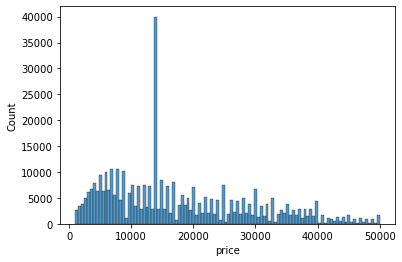

In [33]:
sns.histplot(df_price["price"])

In [34]:
df=df_price.copy()

In [35]:
df["odometer"] = df["odometer"] // 1000

<AxesSubplot:xlabel='odometer'>

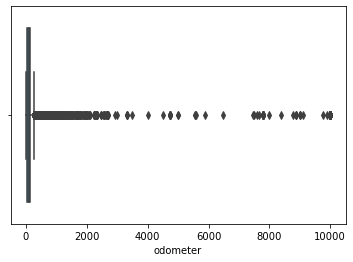

In [36]:
sns.boxplot(x=df['odometer'])

In [37]:
q1=df['odometer'].quantile(0.25)
q3=df['odometer'].quantile(0.75)
IQR=q3-q1
df_odometer = df[~((df['odometer']<(q1-1.5*IQR)) | (df['odometer']>(q3+1.5*IQR)))]

In [38]:
df.shape[0]-df_odometer.shape[0]

3904

In [39]:
100 - (df_odometer.shape[0] * 100 / df.shape[0])

0.9747231127223301

<AxesSubplot:xlabel='odometer'>

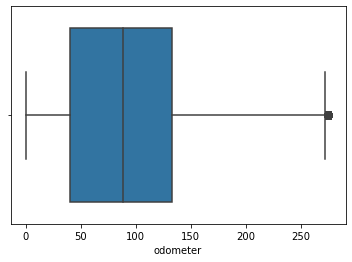

In [40]:
sns.boxplot(x=df_odometer['odometer'])

<AxesSubplot:xlabel='odometer', ylabel='Count'>

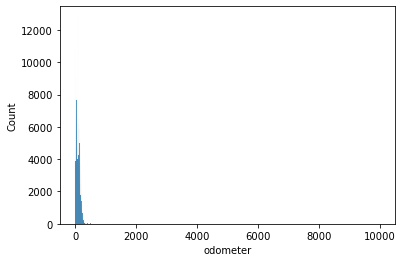

In [41]:
sns.histplot(df["odometer"])

In [42]:
df=df_odometer.copy()

In [43]:
df.describe()

,price,year,odometer
count,"396,620","396,620","396,620"
mean,"17,644.54","2,011.19",91.40
std,"11,506.81",9.23,60.02
min,"1,000","1,900",0
25%,"8,000","2,008",40
50%,"13,990","2,013",88
75%,"25,590","2,017",133
max,"50,000","2,022",277


In [44]:
dummy_columns=[]
for i in unique_values:
    if i[1] < 15:
        dummy_columns.append(i[0])
        
len(dummy_columns)

9

In [45]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [46]:
df_dummy = pd.DataFrame()
for i in dummy_columns:
    print(i)
    df_dummy=pd.concat([df_dummy, pd.get_dummies(df[i],prefix=i)], axis=1)
    

condition
cylinders
fuel
title_status
transmission
drive
size
type
paint_color


In [47]:
df_dummy

,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10,cylinders_12,cylinders_3,cylinders_4,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426876,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426877,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426878,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:

df=df_odometer
df=pd.concat([df, df_dummy], axis=1)

In [49]:
df.shape

(396620, 76)

In [50]:
df.drop(["condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color"], axis=1 ,inplace=True)

In [51]:
df.shape

(396620, 67)

In [52]:
df.head()

,region,price,year,manufacturer,odometer,state,condition_excellent,condition_fair,condition_good,condition_like new,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,prescott,6000,2017,ford,98,az,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,fayetteville,11900,2017,ford,98,ar,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,florida keys,21000,2017,ford,98,fl,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,worcester / central MA,1500,2017,ford,98,ma,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,greensboro,4900,2017,ford,98,nc,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
label_ancoder = ["region","manufacturer","state"]

In [54]:
label = LabelEncoder()

for i in label_ancoder:
    df[i] = label.fit_transform(df[i])

In [55]:
df=df.reset_index()

In [56]:
df.drop('index', inplace=True, axis=1)

In [57]:
df

,region,price,year,manufacturer,odometer,state,condition_excellent,condition_fair,condition_good,condition_like new,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,277,6000,2017,13,98,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,105,11900,2017,13,98,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,111,21000,2017,13,98,9,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,396,1500,2017,13,98,19,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,131,4900,2017,13,98,27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396615,397,23590,2019,31,32,50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
396616,397,30590,2020,41,12,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
396617,397,34990,2020,6,4,50,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
396618,397,28990,2018,23,30,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [59]:
target_name = 'price'
train_target0 = df[target_name]
train0 = df.drop([target_name], axis=1)

In [60]:
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [61]:
train, test, target, target_test = train_test_split(train0, train_target0, test_size=0.33, random_state=0)

In [62]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [83]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print("----------------------------------")
    print("----------------------------------")
    
    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [64]:
linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0, linreg, train, test)

target =  [ 8500  9500  1700  6500 14995]
ytrain =  [10047.47628386 20481.29899665  9717.60008489 12494.88214162
 10889.39451287]
acc(r2_score) for train = 54.31
acc(relative error) for train = 33.0
acc(rmse) for train = 777104.39
target_test = [14495 27990 15222 10788 40940]
ytest = [11888.16428213 31978.25483837 13384.29614227  8765.10220524
 29452.92889195]
acc(r2_score) for test = 54.27
acc(relative error) for test = 33.06
acc(rmse) for test = 779456.74


In [65]:
linear_svr = LinearSVR()
linear_svr.fit(train, target)
acc_model(1,linear_svr,train,test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


target =  [ 8500  9500  1700  6500 14995]
ytrain =  [ 6800.77449303 15732.96470663  8108.30367703  7901.01422207
  7684.65444482]
acc(r2_score) for train = 42.38
acc(relative error) for train = 36.09
acc(rmse) for train = 872690.65
target_test = [14495 27990 15222 10788 40940]
ytest = [10065.23851256 28329.95541582  9347.86874953  5994.5698429
 24492.84331495]
acc(r2_score) for test = 42.76
acc(relative error) for test = 36.04
acc(rmse) for test = 872042.83


In [66]:
sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(2,sgd,train,test)

target =  [ 8500  9500  1700  6500 14995]
ytrain =  [4.62039875e+14 4.40548288e+14 4.44695936e+14 4.48022146e+14
 4.44332956e+14]
acc(r2_score) for train = -1.540416611850234e+23
acc(relative error) for train = 2558673181540.57
acc(rmse) for train = 4.5122024416459784e+16
target_test = [14495 27990 15222 10788 40940]
ytest = [4.43015504e+14 4.55948804e+14 4.46763496e+14 4.58831451e+14
 4.57600314e+14]
acc(r2_score) for test = -1.532827720976533e+23
acc(relative error) for test = 2557971137159.21
acc(rmse) for test = 4.512714906202721e+16


In [67]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
acc_model(3,decision_tree,train,test)

target =  [ 8500  9500  1700  6500 14995]
ytrain =  [ 8500.  9500.  1700.  6500. 14995.]
acc(r2_score) for train = 99.84
acc(relative error) for train = 0.17
acc(rmse) for train = 46399.32
target_test = [14495 27990 15222 10788 40940]
ytest = [14495. 27990. 10200. 10788. 40940.]
acc(r2_score) for test = 70.96
acc(relative error) for test = 17.89
acc(rmse) for test = 621116.13


In [68]:
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(4,random_forest,train,test)

target =  [ 8500  9500  1700  6500 14995]
ytrain =  [ 9454.15  9853.09  2483.63  8803.89 13186.15]
acc(r2_score) for train = 97.71
acc(relative error) for train = 5.66
acc(rmse) for train = 174049.88
target_test = [14495 27990 15222 10788 40940]
ytest = [12246.95333333 27990.         13497.02       10386.32
 38838.63333333]
acc(r2_score) for test = 84.89
acc(relative error) for test = 14.81
acc(rmse) for test = 448080.86


In [69]:
ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(5,ridge,train,test)

target =  [ 8500  9500  1700  6500 14995]
ytrain =  [10047.9604802  20476.39759994  9718.44113323 12495.84519415
 10890.72969783]
acc(r2_score) for train = 54.31
acc(relative error) for train = 33.0
acc(rmse) for train = 777107.08
target_test = [14495 27990 15222 10788 40940]
ytest = [11888.31806872 31976.22725479 13384.0876629   8764.50663242
 29453.08939626]
acc(r2_score) for test = 54.27
acc(relative error) for test = 33.06
acc(rmse) for test = 779448.28


In [70]:
bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(6,bagging,train,test)

target =  [ 8500  9500  1700  6500 14995]
ytrain =  [ 9030.   8710.   2738.9  7889.5 12191. ]
acc(r2_score) for train = 96.77
acc(relative error) for train = 6.35
acc(rmse) for train = 206709.33
target_test = [14495 27990 15222 10788 40940]
ytest = [13365.2 27990.  11968.7  9950.4 36625.5]
acc(r2_score) for test = 83.24
acc(relative error) for test = 15.68
acc(rmse) for test = 471904.82


In [71]:
Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(7,Ada_Boost,train,test)

target =  [ 8500  9500  1700  6500 14995]
ytrain =  [11432.84202833 21372.63740686 11860.40185344 16825.19849652
 11860.40185344]
acc(r2_score) for train = 48.56
acc(relative error) for train = 38.46
acc(rmse) for train = 824560.06
target_test = [14495 27990 15222 10788 40940]
ytest = [14345.36413509 29717.79859536 16825.19849652 11432.84202833
 29717.79859536]
acc(r2_score) for test = 48.91
acc(relative error) for test = 38.42
acc(rmse) for test = 823841.23


In [72]:
etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(8,etr,train,test)

target =  [ 8500  9500  1700  6500 14995]
ytrain =  [ 8500.  9500.  1700.  6500. 14995.]
acc(r2_score) for train = 99.84
acc(relative error) for train = 0.17
acc(rmse) for train = 46401.7
target_test = [14495 27990 15222 10788 40940]
ytest = [13447.6        27990.         11816.56833333 10788.
 40306.49      ]
acc(r2_score) for test = 85.56
acc(relative error) for test = 13.08
acc(rmse) for test = 438015.62


In [73]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear SVR', 'Stochastic Gradient Decent', 
              'Decision Tree Regressor', 'Random Forest', 'RidgeRegressor', 
              'BaggingRegressor', 'AdaBoostRegressor', 'ExtraTreesRegressor'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [74]:
pd.options.display.float_format = '{:,.2f}'.format

In [75]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
8,ExtraTreesRegressor,99.84,85.56,0.17,13.08,"46,401.70","438,015.62"
4,Random Forest,97.71,84.89,5.66,14.81,"174,049.88","448,080.86"
6,BaggingRegressor,96.77,83.24,6.35,15.68,"206,709.33","471,904.82"
3,Decision Tree Regressor,99.84,70.96,0.17,17.89,"46,399.32","621,116.13"
0,Linear Regression,54.31,54.27,33.00,33.06,"777,104.39","779,456.74"
5,RidgeRegressor,54.31,54.27,33.00,33.06,"777,107.08","779,448.28"
7,AdaBoostRegressor,48.56,48.91,38.46,38.42,"824,560.06","823,841.23"
1,Linear SVR,42.38,42.76,36.09,36.04,"872,690.65","872,042.83"
2,Stochastic Gradient Decent,"-154,041,661,185,023,402,835,968.00","-153,282,772,097,653,289,254,912.00","2,558,673,181,540.57","2,557,971,137,159.21","45,122,024,416,459,784.00","45,127,149,062,027,208.00"


In [76]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
8,ExtraTreesRegressor,99.84,85.56,0.17,13.08,"46,401.70","438,015.62"
4,Random Forest,97.71,84.89,5.66,14.81,"174,049.88","448,080.86"
6,BaggingRegressor,96.77,83.24,6.35,15.68,"206,709.33","471,904.82"
3,Decision Tree Regressor,99.84,70.96,0.17,17.89,"46,399.32","621,116.13"
0,Linear Regression,54.31,54.27,33.00,33.06,"777,104.39","779,456.74"
5,RidgeRegressor,54.31,54.27,33.00,33.06,"777,107.08","779,448.28"
1,Linear SVR,42.38,42.76,36.09,36.04,"872,690.65","872,042.83"
7,AdaBoostRegressor,48.56,48.91,38.46,38.42,"824,560.06","823,841.23"
2,Stochastic Gradient Decent,"-154,041,661,185,023,402,835,968.00","-153,282,772,097,653,289,254,912.00","2,558,673,181,540.57","2,557,971,137,159.21","45,122,024,416,459,784.00","45,127,149,062,027,208.00"


In [77]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
8,ExtraTreesRegressor,99.84,85.56,0.17,13.08,"46,401.70","438,015.62"
4,Random Forest,97.71,84.89,5.66,14.81,"174,049.88","448,080.86"
6,BaggingRegressor,96.77,83.24,6.35,15.68,"206,709.33","471,904.82"
3,Decision Tree Regressor,99.84,70.96,0.17,17.89,"46,399.32","621,116.13"
5,RidgeRegressor,54.31,54.27,33.00,33.06,"777,107.08","779,448.28"
0,Linear Regression,54.31,54.27,33.00,33.06,"777,104.39","779,456.74"
7,AdaBoostRegressor,48.56,48.91,38.46,38.42,"824,560.06","823,841.23"
1,Linear SVR,42.38,42.76,36.09,36.04,"872,690.65","872,042.83"
2,Stochastic Gradient Decent,"-154,041,661,185,023,402,835,968.00","-153,282,772,097,653,289,254,912.00","2,558,673,181,540.57","2,557,971,137,159.21","45,122,024,416,459,784.00","45,127,149,062,027,208.00"
